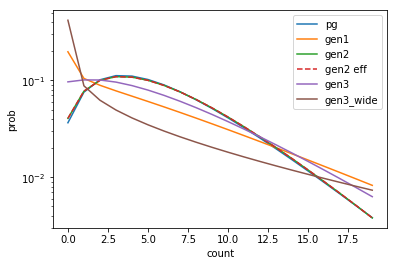

In [8]:
import llh_defs.poisson as poisson
import numpy
import scipy.special
import pylab
import llh_defs.multinomial as multinomial

### two bins with uneven pseudo MonteCarlo weight distribution -> plot finite-sample binomial distribution as special case of finite-sample 
### multinomial.. just because it is possible

log_stirling=poisson.generate_log_stirling(max_val=300)
# sum weights first bin: 4.0  - 3 weighted events total
weights_bin1_ds1=numpy.array([1.0,0.2,2.8])
weights_bin1_ds2=numpy.array([2.0])
weights_bin1_ds3=numpy.array([])

k_list=numpy.array([2])


weights_dict=dict()
weights_dict["sig"]=[weights_bin1_ds1]
weights_dict["bg"]=[weights_bin1_ds2]
weights_dict["third"]=[weights_bin1_ds3]


counts=numpy.arange(20)

yvals_standard_pg=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, mean_adjustment=False)) for i in counts]
yvals_gen1=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen1", mean_adjustment=False)) for i in counts]
yvals_gen2=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen2", mean_adjustment=False)) for i in counts]
yvals_gen2_effective=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen2_effective", mean_adjustment=False)) for i in counts]
yvals_gen3_wide=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen3", s_factor=10, log_stirling=log_stirling)) for i in counts]
yvals_gen3=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen3", log_stirling=log_stirling)) for i in counts]

ax=pylab.gca()

pylab.plot(counts, yvals_standard_pg, label="pg")
pylab.plot(counts, yvals_gen1, label="gen1")
pylab.plot(counts, yvals_gen2, label="gen2")
pylab.plot(counts, yvals_gen2_effective, label="gen2 eff", ls="--")
pylab.plot(counts, yvals_gen3, label="gen3")
pylab.plot(counts, yvals_gen3_wide, label="gen3_wide")

pylab.legend()
pylab.semilogy()
ax.set_xlabel("count")
ax.set_ylabel("prob")
pylab.show()
